#### 데이터 준비

In [2]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('./data/공공보건 의료기관 현황.csv',encoding='utf-8',index_col=0)
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


#### 주소 전처리 - 정제

In [7]:
# 주소 시도, 구분 정보 분리
addr = pd.DataFrame(data.주소.apply(lambda v : v.split()[:2]).tolist(),columns=('시도','구군'))
addr.head()

,시도,구군
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [17]:
addr.시도.unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [9]:
# 창원시
addr[addr.시도=='창원시']

,시도,구군
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [10]:
addr.iloc[27] = ['경상남도','창원시']
addr.iloc[31] = ['경상남도','창원시']

In [12]:
addr[addr.시도=='경산시']

,시도,구군
47,경산시,경안로


In [13]:
addr.iloc[47] = ['경상북도','경산시']

In [15]:
addr[addr.시도=='천안시']

,시도,구군
209,천안시,동남구
210,천안시,동남구


In [16]:
addr.iloc[209] = ['충청남도','천안시']
addr.iloc[210] = ['충청남도','천안시']

#### 경기 -> 경기도 / 경남 -> 경상남도 / 부산특별시 -> 부산광역시

In [18]:
addr_aliases = {'경기':'경기도','경남':'경상남도','경북':'경상북도','충북':'충청북도','서울시':'서울특별시','부산특별시':'부산광역시','대전시':'대전광역시','충남':'충청남도','전남':'전라남도','전북':'전라북도'}

In [20]:
addr['시도'] = addr.시도.apply(lambda v:addr_aliases.get(v,v))
addr.시도.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [27]:
addr.구군.unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [25]:
addr[addr.구군=='아란13길']

,시도,구군
75,제주특별자치도,아란13길


In [26]:
addr.iloc[75]=['제주특별자치도','제주시']

#### 행정구역별 공공보건의료기관 수

In [30]:
addr['행정구역'] = addr.apply(lambda r: r.시도+' '+r.구군,axis=1)
addr.head()

,시도,구군,시도구군,행정구역
0,강원도,춘천시,강원도 춘천시,강원도 춘천시
1,강원도,삼척시,강원도 삼척시,강원도 삼척시
2,강원도,영월군,강원도 영월군,강원도 영월군
3,강원도,원주시,강원도 원주시,강원도 원주시
4,강원도,강릉시,강원도 강릉시,강원도 강릉시


In [31]:
addr['count']=0
addr

,시도,구군,시도구군,행정구역,count
0,강원도,춘천시,강원도 춘천시,강원도 춘천시,0
1,강원도,삼척시,강원도 삼척시,강원도 삼척시,0
2,강원도,영월군,강원도 영월군,강원도 영월군,0
3,강원도,원주시,강원도 원주시,강원도 원주시,0
4,강원도,강릉시,강원도 강릉시,강원도 강릉시,0
...,...,...,...,...,...
222,충청북도,제천시,충청북도 제천시,충청북도 제천시,0
223,충청북도,충주시,충청북도 충주시,충청북도 충주시,0
224,충청북도,충주시,충청북도 충주시,충청북도 충주시,0
225,충청북도,영동군,충청북도 영동군,충청북도 영동군,0


In [32]:
addr_group = pd.DataFrame(addr.groupby(['시도','구군','행정구역'],as_index=False).count())
addr_group

,시도,구군,행정구역,시도구군,count
0,강원도,강릉시,강원도 강릉시,4,4
1,강원도,동해시,강원도 동해시,1,1
2,강원도,삼척시,강원도 삼척시,1,1
3,강원도,속초시,강원도 속초시,1,1
4,강원도,양구군,강원도 양구군,1,1
...,...,...,...,...,...
135,충청북도,영동군,충청북도 영동군,1,1
136,충청북도,제천시,충청북도 제천시,1,1
137,충청북도,청원군,충청북도 청원군,1,1
138,충청북도,청주시,충청북도 청주시,4,4


In [35]:
addr_group = addr_group.drop(columns='시도구군')
addr_group

KeyError: "['시도구군'] not found in axis"

In [37]:
addr_group = addr_group.set_index('행정구역')
addr_group

,시도,구군,count
행정구역,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


#### 행정구역별 인구수 데이터 가져오기

In [38]:
!pip install openpyxl

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [39]:
population = pd.read_excel('./data/행정구역_시군구_성별_인구수.xlsx')
population.head()

,행정구역1,행정구역2,총인구수,남자인구,여자인구
0,전국,소계,51574446,25708650,25865796
1,서울특별시,소계,9493211,4604405,4888806
2,서울특별시,종로구,143547,69463,74084
3,서울특별시,중구,122138,59360,62778
4,서울특별시,용산구,222262,106743,115519


In [41]:
population.rename(columns={'행정구역1':'시도','행정구역2':'구군'},inplace=True)
population.tail()

,시도,구군,총인구수,남자인구,여자인구
287,경상남도,거창군,60531,29716,30815
288,경상남도,합천군,42482,20584,21898
289,제주특별자치도,소계,678491,339951,338540
290,제주특별자치도,제주시,493898,246826,247072
291,제주특별자치도,서귀포시,184593,93125,91468


In [43]:
population.구군

0           소계
1           소계
2       　　　종로구
3        　　　중구
4       　　　용산구
        ...   
287     　　　거창군
288     　　　합천군
289         소계
290     　　　제주시
291    　　　서귀포시
Name: 구군, Length: 292, dtype: object

In [45]:
for item in range(0,len(population)):
    population['구군'][item] = population['구군'][item].strip()

C:\Users\0\AppData\Local\Temp\ipykernel_17564\1817576539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['구군'][item] = population['구군'][item].strip()


In [46]:
population.tail()

,시도,구군,총인구수,남자인구,여자인구
287,경상남도,거창군,60531,29716,30815
288,경상남도,합천군,42482,20584,21898
289,제주특별자치도,소계,678491,339951,338540
290,제주특별자치도,제주시,493898,246826,247072
291,제주특별자치도,서귀포시,184593,93125,91468


In [47]:
population['행정구역'] = population.apply(lambda r:r.시도+' '+r.구군,axis=1)
population.head()

,시도,구군,총인구수,남자인구,여자인구,행정구역
0,전국,소계,51574446,25708650,25865796,전국 소계
1,서울특별시,소계,9493211,4604405,4888806,서울특별시 소계
2,서울특별시,종로구,143547,69463,74084,서울특별시 종로구
3,서울특별시,중구,122138,59360,62778,서울특별시 중구
4,서울특별시,용산구,222262,106743,115519,서울특별시 용산구


In [48]:
population.set_index('행정구역',inplace=True)
population.head()

,시도,구군,총인구수,남자인구,여자인구
행정구역,,,,,
전국 소계,전국,소계,51574446,25708650,25865796
서울특별시 소계,서울특별시,소계,9493211,4604405,4888806
서울특별시 종로구,서울특별시,종로구,143547,69463,74084
서울특별시 중구,서울특별시,중구,122138,59360,62778
서울특별시 용산구,서울특별시,용산구,222262,106743,115519


#### 보건의료기관수 df, 인구수 df 병합

In [49]:
all_data = pd.merge(addr_group,population,how='inner',left_index=True,right_index=True)

all_data.head()

,시도_x,구군_x,count,시도_y,구군_y,총인구수,남자인구,여자인구
행정구역,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,212260,105312,106948
강원도 동해시,강원도,동해시,1,강원도,동해시,89683,45584,44099
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,64046,32390,31656
강원도 속초시,강원도,속초시,1,강원도,속초시,83035,41174,41861
강원도 양구군,강원도,양구군,1,강원도,양구군,21555,11303,10252


#### 병합한 df에서 필요없는 컬럼 (시도_y,구군_y,남자인구,여자인구) 삭제

In [53]:
last_data = all_data[['시도_x','구군_x','count','총인구수']]
last_data = last_data.rename(columns={'시도_x':'시도','구군_x':'구군','총인구수':'인구수'})
last_data

,시도,구군,count,인구수
행정구역,,,,
강원도 강릉시,강원도,강릉시,4,212260
강원도 동해시,강원도,동해시,1,89683
강원도 삼척시,강원도,삼척시,1,64046
강원도 속초시,강원도,속초시,1,83035
강원도 양구군,강원도,양구군,1,21555
...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,28014
충청북도 영동군,충청북도,영동군,1,45321
충청북도 제천시,충청북도,제천시,1,131816


In [54]:
mc_count = last_data['count']
mc_count

행정구역
강원도 강릉시     4
강원도 동해시     1
강원도 삼척시     1
강원도 속초시     1
강원도 양구군     1
           ..
충청북도 단양군    1
충청북도 영동군    1
충청북도 제천시    1
충청북도 청주시    4
충청북도 충주시    2
Name: count, Length: 138, dtype: int64

In [55]:
# 인구 10만명당 공공기관 비율 계산
last_data['mc_ratio'] = mc_count.div(last_data.인구수,axis=0)*100000
last_data.head()

,시도,구군,count,인구수,mc_ratio
행정구역,,,,,
강원도 강릉시,강원도,강릉시,4,212260,1.884481
강원도 동해시,강원도,동해시,1,89683,1.115039
강원도 삼척시,강원도,삼척시,1,64046,1.561378
강원도 속초시,강원도,속초시,1,83035,1.204311
강원도 양구군,강원도,양구군,1,21555,4.639295


In [56]:
last_data.to_csv('./data/인구대비_공공보건기관.csv',encoding='utf-8')

#### 바차트 그리기

In [65]:
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc,rcParams,style

In [66]:
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font)

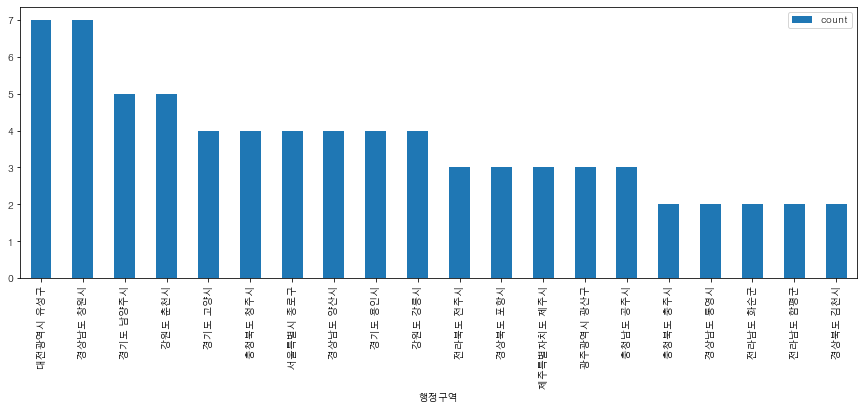

In [69]:
mc_data = last_data[['count']]
mc_data = mc_data.sort_values('count',ascending=False)

mc_data_top = mc_data.head(20) # 상위 20개 데이터만 출력
plt.rcParams['figure.figsize']=(15,5)
mc_data_top.plot(kind='bar',rot=90)
plt.show()

#### 블록맵

In [70]:
data_draw_kor = pd.read_csv('./data/data_draw_korea.csv',index_col=0,encoding='utf-8')
data_draw_kor.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [71]:
data_draw_kor.rename(columns={'행정구역':'구군'},inplace=True)
data_draw_kor.head(2)

,인구수,shortName,x,y,면적,광역시도,구군
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


In [72]:
data_draw_kor['행정구역'] = data_draw_kor.apply(lambda r:r.광역시도+' '+r.구군,axis=1)
data_draw_kor

,인구수,shortName,x,y,면적,광역시도,구군,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시,강원도 강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군,강원도 고성군
2,86747,동해,11,5,180.01,강원도,동해시,강원도 동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시,강원도 삼척시
4,76733,속초,9,1,105.25,강원도,속초시,강원도 속초시
...,...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시,충청북도 제천시
225,34480,증평,6,11,81.84,충청북도,증평군,충청북도 증평군
226,62809,진천,5,11,406.08,충청북도,진천군,충청북도 진천군
227,790216,청주,6,12,932.51,충청북도,청주시,충청북도 청주시


In [73]:
data_draw_kor = data_draw_kor.set_index('행정구역')
data_draw_kor.head(2)

,인구수,shortName,x,y,면적,광역시도,구군
행정구역,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군


In [74]:
# 공공보건기관이 없는 지역도 나와야 하기 때문에 outer로 merge
data_draw_kor_mc_pop_all = pd.merge(data_draw_kor,last_data,how='outer',left_index=True,right_index=True)
data_draw_kor_mc_pop_all.head()

,인구수_x,shortName,x,y,면적,광역시도,구군_x,시도,구군_y,count,인구수_y,mc_ratio
행정구역,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,212260.0,1.884481
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,89683.0,1.115039
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,64046.0,1.561378
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,83035.0,1.204311


##### 블록맵 시각화

- 가져와서 쓸것

In [75]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

##### 블록맵에서 해당 데이터를 매핑, 색을 표시하는 함수

In [78]:
def draw_blockMap(blockedMap, targetData, title, color ):
    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(8, 13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
            dispname = '{}\n{}'.format(row['광역시도'][:2], row['구군_x'][:-1])
            if len(row['구군_x']) <= 2:
                dispname += row['구군_x'][-1]
        else:
            dispname = row['구군_x'][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
    
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)
    plt.axis('off')
    
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    plt.savefig('./data/' + 'blockMap_' + targetData + '.png')
                      
    
    plt.show()

##### 행정구역별 공공보건기관 수 블록맵

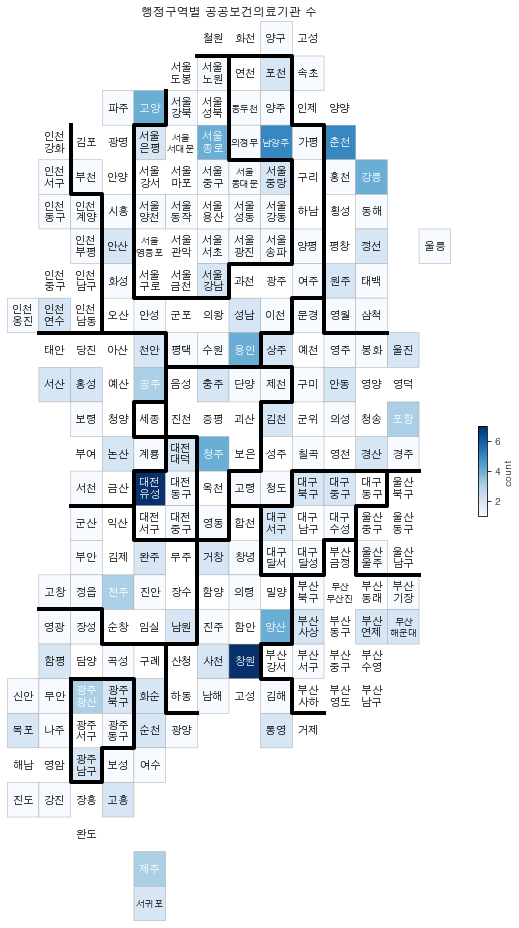

In [79]:
draw_blockMap(data_draw_kor_mc_pop_all,'count','행정구역별 공공보건의료기관 수','Blues')

##### 인구수 대비 공공의료기관 비율 블록맵

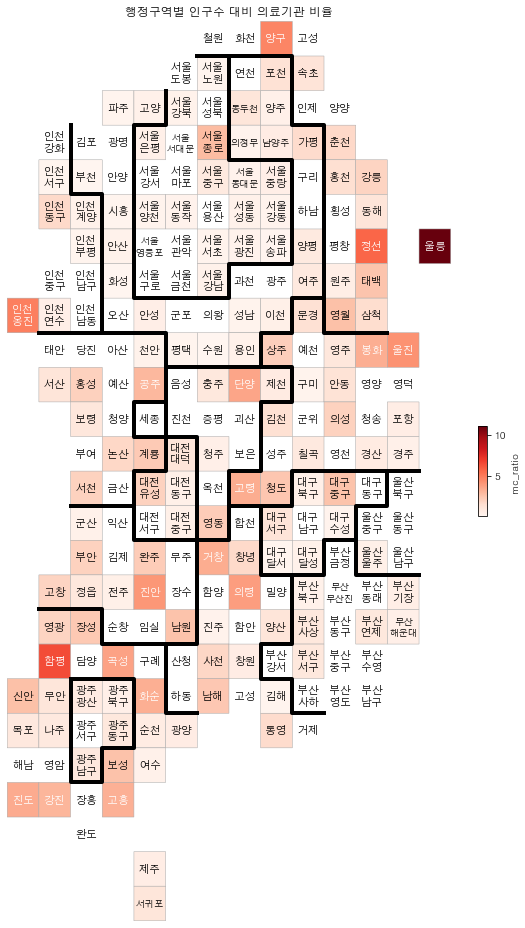

In [80]:
draw_blockMap(data_draw_kor_mc_pop_all,'mc_ratio','행정구역별 인구수 대비 의료기관 비율','Reds')